In [1]:
import sys
sys.path.append('C:\\Users\\ARENAALAIA\\Downloads\\imageforgerydetection')
import cv2
import os
import numpy as np
from tqdm import tqdm
from  src.utils import ImageOperations, MetricUtils
from src.dataprep import DataPrep
import matplotlib.pyplot as plt
import cv2

import concurrent.futures
import time

In [2]:
try:
    os.mkdir('../input/groundtruths/inverted-masks')
except:
    print('folder created')

In [3]:
# invert all the maks in IEEE frist forensics challenge Dataset
for file in tqdm(os.listdir('../input/groundtruths/first-image-forensics-masks/')):
    img = cv2.imread('../input/groundtruths/first-image-forensics-masks/' + file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img = np.logical_not(th3).astype(int) # invert image
    cv2.imwrite('../input/groundtruths/inverted-masks/' + file, img * 255)

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [00:14<00:00, 32.10it/s]


In [4]:
imageOperations = ImageOperations()

1536 2048 3


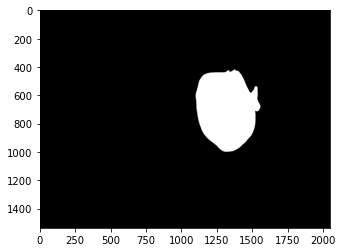

In [5]:
imageOperations.showImage('../input/groundtruths/inverted-masks/010543abfbd0db1e9aa1b24604336e0c.mask.png')

In [8]:
try:
    os.mkdir('../input/groundtruths/CASIA-2-Groundtruth2/')
except:
    print('folder created')

for file in tqdm(os.listdir('../input/groundtruths/casia-masks/')):
    img = cv2.imread('../input/groundtruths/casia-masks/' + file)
    name_arr = file.split('_')
    cv2.imwrite('../input/groundtruths/CASIA-2-Groundtruth2/' + name_arr[-2] + '_gt.png', img)

  1%|▋                                                                              | 44/5123 [00:00<00:11, 432.53it/s]

folder created


100%|█████████████████████████████████████████████████████████████████████████████| 5123/5123 [00:11<00:00, 428.58it/s]


In [9]:
try:
    os.mkdir('../input/data-prep')
    os.mkdir('../input/data-prep/train')
    os.mkdir('../input/data-prep/train/pristine')
    os.mkdir('../input/data-prep/train/fake')
    os.mkdir('../input/data-prep/test')
    os.mkdir('../input/data-prep/test/pristine')
    os.mkdir('../input/data-prep/test/fake')
    os.mkdir('../input/data-prep/validation')
    os.mkdir('../input/data-prep/validation/pristine')
    os.mkdir('../input/data-prep/validation/fake')
except:
    print('folders already created')

In [3]:
try:
    os.mkdir('../input/patches')
    os.mkdir('../input/patches/train')
    os.mkdir('../input/patches/train/pristine')
    os.mkdir('../input/patches/train/fake')
    os.mkdir('../input/patches/test')
    os.mkdir('../input/patches/test/pristine')
    os.mkdir('../input/patches/test/fake')
    os.mkdir('../input/patches/validation')
    os.mkdir('../input/patches/validation/pristine')
    os.mkdir('../input/patches/validation/fake')
except:
    print('folders already created')

In [6]:
dataPrepare = DataPrep()

In [12]:
indexes, patch_arr = dataPrepare.ExtractPatches('../input/data/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif', '../input/groundtruths/CASIA-2-Groundtruth2/00138_gt.png')

In [13]:
indexes.shape

(500,)

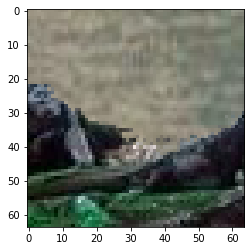

In [14]:
plt.imshow(patch_arr[450])
plt.show()

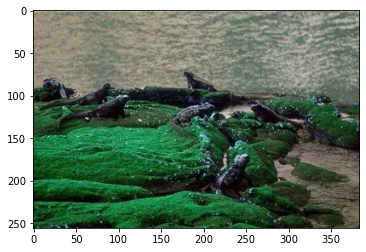

In [15]:
img = cv2.imread('../input/data/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif')
plt.imshow(img)
plt.show()

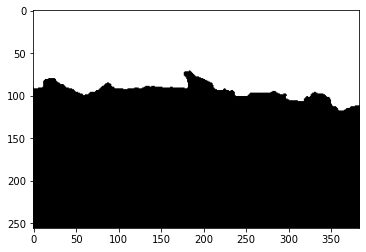

In [16]:
img = cv2.imread('../input/groundtruths/CASIA-2-Groundtruth2/00138_gt.png')
plt.imshow(img)
plt.show()

In [17]:
# split data
# dataPrepare# source directories
Pristine_SOURCE_DIR = "../input/data/dataset-dist/phase-01/training/pristine/"
Fake_SOURCE_DIR = "../input/data/dataset-dist/phase-01/training/fake/"
# pristine directories
TRAINING_PRISTINE_DIR = "../input/data-prep/train/pristine/"
TESTING_PRISTINE_DIR = "../input/data-prep/test/pristine/"
VALIDATION_PRISTINE_DIR = "../input/data-prep/validation/pristine/"
# fake directories
TRAINING_FAKE_DIR = "../input/data-prep/train/fake/"
TESTING_FAKE_DIR = "../input/data-prep/test/fake/"
VALIDATION_FAKE_DIR = "../input/data-prep/validation/fake/"

dataPrepare.splitData(Pristine_SOURCE_DIR, TRAINING_PRISTINE_DIR, TESTING_PRISTINE_DIR,VALIDATION_PRISTINE_DIR, 0.1, 0.2)
dataPrepare.splitData(Fake_SOURCE_DIR, TRAINING_FAKE_DIR, TESTING_FAKE_DIR, VALIDATION_FAKE_DIR, 0.1, 0.2)




735 210 105
*********Data splitting done************
315 90 45
*********Data splitting done************


In [18]:
Pristine_SOURCE_DIR = "../input/data/Au/"
Fake_SOURCE_DIR = "../input/data/Tp/"

dataPrepare.splitData(Pristine_SOURCE_DIR, TRAINING_PRISTINE_DIR, TESTING_PRISTINE_DIR,VALIDATION_PRISTINE_DIR, 0.1, 0.2)
dataPrepare.splitData(Fake_SOURCE_DIR, TRAINING_FAKE_DIR, TESTING_FAKE_DIR, VALIDATION_FAKE_DIR, 0.1, 0.2)


5243 1498 749
*********Data splitting done************
3586 1024 512
*********Data splitting done************


In [6]:
# creating train fake patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/train/fake/')):
    try:
        img_path = '../input/data-prep/train/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.ExtractPatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/train/fake/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file)

100%|████████████████████████████████████████████████████████████████████████████| 3901/3901 [2:05:12<00:00,  1.93s/it]


In [7]:
# creating test fake patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/test/fake/')):
    try:
        img_path = '../input/data-prep/test/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.ExtractPatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/test/fake/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file)

100%|██████████████████████████████████████████████████████████████████████████████| 1114/1114 [33:56<00:00,  1.83s/it]


In [8]:
# creating validation fake patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/validation/fake/')):
    try:
        img_path = '../input/data-prep/validation/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.ExtractPatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/validation/fake/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file)

100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [18:03<00:00,  1.94s/it]


In [7]:
# extracting trian pristine patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/train/fake/')):
    try:
        img_path = '../input/data-prep/train/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.extractPristinePatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/train/pristine/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file) 

  2%|█▊                                                                            | 91/3901 [13:47<5:10:23,  4.89s/it]

could not broadcast input array from shape (58) into shape (64)
aa3b4f7caf9de8c1d6551c33045fb4c1.png


  3%|██▎                                                                          | 117/3901 [14:54<4:07:31,  3.92s/it]

could not broadcast input array from shape (58) into shape (64)
b0060704d02f1229b75cbd550c7267b4.png


  4%|███▎                                                                         | 166/3901 [18:47<8:54:44,  8.59s/it]

could not broadcast input array from shape (58) into shape (64)
bc04da26ab41ce92565dd3c686dae6c8.png


  6%|████▍                                                                        | 223/3901 [22:33<3:05:56,  3.03s/it]

could not broadcast input array from shape (58) into shape (64)
ca472f184807aded538221ac0b5ac27b.png


  6%|████▌                                                                        | 234/3901 [23:53<4:44:43,  4.66s/it]

could not broadcast input array from shape (58) into shape (64)
cc263a4c9ff9943acbb9049f637a0bed.png


  7%|█████▌                                                                      | 287/3901 [28:58<11:15:40, 11.22s/it]

could not broadcast input array from shape (58) into shape (64)
d9b9f5db7d29a3855cceef574145b595.png


 12%|█████████▊                                                                     | 485/3901 [37:20<24:29,  2.32it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_CRN_S_N_ani10191_ani10190_12437.jpg


 14%|███████████▎                                                                   | 556/3901 [38:11<16:50,  3.31it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_NND_M_B_nat20098_nat20073_01602.tif


 28%|█████████████████████▉                                                        | 1096/3901 [43:58<37:21,  1.25it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_NRN_M_N_nat10134_nat00095_11912.jpg


 28%|█████████████████████▉                                                        | 1097/3901 [43:59<31:16,  1.49it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_D_NRN_M_N_nat10134_nat10124_11913.jpg


 54%|█████████████████████████████████████████▊                                    | 2089/3901 [56:30<19:28,  1.55it/s]

could not broadcast input array from shape (56) into shape (64)
Tp_S_CRN_S_N_art00059_art00059_10508.tif


 59%|█████████████████████████████████████████████                               | 2316/3901 [1:00:01<25:03,  1.05it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_S_NND_S_N_sec20064_sec20064_01654.tif


 72%|███████████████████████████████████████████████████████                     | 2825/3901 [1:07:35<16:44,  1.07it/s]

could not broadcast input array from shape (63) into shape (64)
Tp_S_NNN_S_N_art20077_art20077_01883.tif


100%|████████████████████████████████████████████████████████████████████████████| 3901/3901 [1:19:07<00:00,  1.22s/it]


In [5]:
# extracting test pristine patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/test/fake/')):
    try:
        img_path = '../input/data-prep/test/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.extractPristinePatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/test/pristine/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file) 

  7%|█████▍                                                                          | 76/1114 [06:33<43:32,  2.52s/it]

could not broadcast input array from shape (58) into shape (64)
d4aff0ad5f4f99fc6cad4243b926eda7.png


  9%|██████▉                                                                         | 97/1114 [09:39<20:34,  1.21s/it]

could not broadcast input array from shape (56) into shape (64)
Tp_D_CNN_M_N_sec00011_cha00085_11227.jpg


 80%|███████████████████████████████████████████████████████████████                | 889/1114 [17:39<02:33,  1.47it/s]

could not broadcast input array from shape (0,64) into shape (64)
Tp_S_NNN_S_N_ind20037_ind20037_01778.tif


 84%|██████████████████████████████████████████████████████████████████▍            | 936/1114 [18:03<01:37,  1.82it/s]

could not broadcast input array from shape (56) into shape (64)
Tp_S_NNN_S_N_sec00012_sec00012_11230.jpg


 87%|████████████████████████████████████████████████████████████████████▊          | 970/1114 [18:18<01:06,  2.17it/s]

could not broadcast input array from shape (62) into shape (64)
Tp_S_NRD_S_N_arc20079_arc20079_01719.tif


100%|██████████████████████████████████████████████████████████████████████████████| 1114/1114 [19:35<00:00,  1.05s/it]


In [6]:
# extracting validation pristine patches
index = 0
for file in tqdm(os.listdir('../input/data-prep/validation/fake/')):
    try:
        img_path = '../input/data-prep/validation/fake/' + file
        mask_path = ''
        if file.startswith('Tp'):
            img_parts = file.split('_')
            img_parts = img_parts[-1]
            img_parts = img_parts.split('.')
            mask_path = '../input/groundtruths/CASIA-2-Groundtruth2/' + img_parts[-2] + '_gt.png' 
        else:
            img_parts = file.split('.')
            mask_path = '../input/groundtruths/inverted-masks/' + img_parts[0] + '.mask.png'
        if mask_path != '':
            sample, img_patches =  dataPrepare.extractPristinePatches(img_path, mask_path)
            for i in range(len(img_patches)):
                cv2.imwrite('../input/patches/validation/pristine/' + file + '_' + str(sample[i]) + '.png', img_patches[i])
    except Exception as e:
        print(e)
        print(file) 

 15%|███████████▉                                                                     | 82/558 [04:19<02:52,  2.76it/s]

could not broadcast input array from shape (56) into shape (64)
Tp_D_CRN_S_N_nat10130_pla00049_11524.jpg


100%|████████████████████████████████████████████████████████████████████████████████| 558/558 [08:17<00:00,  1.12it/s]


In [25]:
def extractPristinePatchesFromPristine(img_path, threshold = 500):
    #print(img_path)
    patches = []
    new_img = cv2.imread(img_path)
    #mask = cv2.imread(mask_path)
    #mask_grey = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY) # this would convert the 3 channel image to single channel
    #blur = cv2.GaussianBlur(mask_grey,(5,5),0) # to remove any noise present
    #ret3, new_mask = cv2.threshold(blur,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # ostru binary thresholding
    #print(img_path)
    (h, w, c) = new_img.shape
    #print(h,w)
    h_range = h - 64
    w_range = w - 64
    # print(h_range, w_range)
    for i in range(0,h_range, 2):
        for j in range(0, w_range, 2):
            patch = np.zeros((64,64,3))
            for k in range(64):
                # print(new_img.shape)
                row = new_img[(i + k):(i + 1 + k), ( j ) : (j+ 64), :]
                patch[k, :, :] = row

        patch = np.array(patch, dtype='int')
        patches.append(patch)
        
    if len(patches) > 500:
        patches_index = np.random.choice(len(patches), 500, replace=False)
        patch_arr = [patches[q] for q in patches_index]
    else:
        patches_index = list(range(len(patches)))
        patch_arr = patches

    return patches_index, patch_arr


In [26]:
def extractPristineFromPristine(img):
    path = '../input/data-prep/train/pristine/' + img
    # print(path)
    sample, img_patches = extractPristinePatchesFromPristine(path)
    #print(len(img_patches))
    for i in range(len(img_patches)):
        cv2.imwrite('../input/patches/train/pristine/' + img + '_' + str(sample[i]) + '.png', img_patches[i])

In [8]:
images = os.listdir('../input/data-prep/train/pristine/')

In [16]:
import concurrent.futures
t1 = time.perf_counter()

with concurrent.futures.ProcessPoolExecutor(max_workers=4) as executor:
    executor.map(extractPristineFromPristine, images)
t2 = time.perf_counter()
print(f'Finished in {t2-t1} seconds')

Finished in 0.0992745000000923 seconds


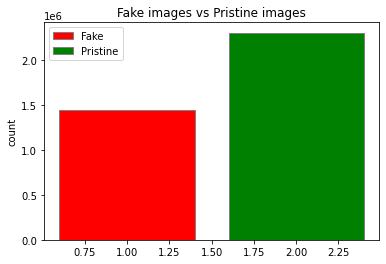

In [8]:
fakeImages = len(os.listdir('../input/patches/train/fake/'))
pristineImages = len(os.listdir('../input/patches/train/pristine/'))

plt.bar(1, fakeImages, color ='r',
        edgecolor ='grey', label ='Fake') 
plt.bar(2, pristineImages, color ='g',
        edgecolor ='grey', label ='Pristine')
plt.ylabel('count')
plt.legend()
plt.title('Fake images vs Pristine images')
plt.show()

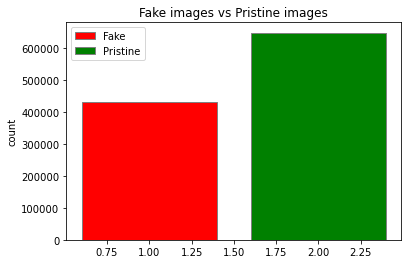

In [9]:
fakeImages = len(os.listdir('../input/patches/test/fake/'))
pristineImages = len(os.listdir('../input/patches/test/pristine/'))

plt.bar(1, fakeImages, color ='r',
        edgecolor ='grey', label ='Fake') 
plt.bar(2, pristineImages, color ='g',
        edgecolor ='grey', label ='Pristine')
plt.ylabel('count')
plt.legend()
plt.title('Fake images vs Pristine images')
plt.show()

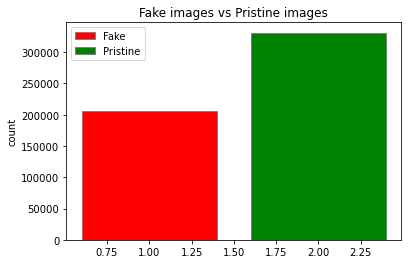

In [10]:
fakeImages = len(os.listdir('../input/patches/validation/fake/'))
pristineImages = len(os.listdir('../input/patches/validation/pristine/'))

plt.bar(1, fakeImages, color ='r',
        edgecolor ='grey', label ='Fake') 
plt.bar(2, pristineImages, color ='g',
        edgecolor ='grey', label ='Pristine')
plt.ylabel('count')
plt.legend()
plt.title('Fake images vs Pristine images')
plt.show()